In [2]:
import pandas as pd
from PIL import Image
from IPython.display import display
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Exploring Factors Contributing to Severity of US Motor Vehicle Accidents


### Group Members
* Arshia Vadhani
* Matthew Jacobsen
* Laura Diaz Rodriguez
* Meiyan Liu

# Introduction:
Car accidents remain a leading cause of accidental death worldwide, with various countries permitting individuals as young as 15 to operate vehicles. Numerous factors contribute to the occurrence of car accidents, including but not limited to weather conditions, visibility, vehicle speed, vehicle type, alcohol consumption, drug use, and driver distraction. With the legalization of recreational drugs, increasing alcohol consumption in social settings, and the growing mobile phone use among younger populations, the frequency of car accidents is expected to rise. The consequences of these incidents can vary significantly, ranging from minor injuries to fatalities. This project aims to investigate the key factors contributing to car accidents that can ultimately lead to the development of strategies targeted at keeping people safe.

# Problem Statement
Car accidents are a major global public safety concern, with numerous contributing factors. However, the specific factors that lead to fatal accidents are not as widely understood. This study aims to identify the key contributing factors via correlation to both general car accidents and fatal accidents in particular. By examining possible conducive variables, we seek to better understand the dynamics of these incidents by providing data-driven insights on the average weight of each factor on accident severity.


## Relevancy & Inspiration
The relevance of this problem lies in the persistent and growing nature of car accidents, which continue to pose significant risks to public safety worldwide. With an increasing number of variables influencing these incidents, understanding the root causes of fatal accidents is crucial to mitigating their impact. With the increasing population of drivers, it is essential to prioritize the education of safe driving practices. The most effective way to achieve this is by identifying the key elements that contribute to these dangerous, often fatal, crashes. Research indicates that nearly 77% of Americans have been involved in a motor vehicle accident, highlighting the need to mitigate injury severity. By analyzing these factors, we aim to provide insights that support safer driving practices and policy improvements.

# Data Source

The dataset used in this study is a consolidated database of police-reported motor vehicle traffic accidents in the United States, compiled for actuarial applications. The data originates from the U.S. National Highway Traffic Safety Administration (NHTSA) and includes records from two key public sources:

1. Crash Report Sampling System (CRSS) – A nationally representative sample of approximately 50,000 police-reported motor vehicle traffic accidents (MVTAs) per year since 2016, replacing the earlier General Estimates System (GES) (2001–2015).
2. Fatality Analysis Reporting System (FARS) – A national census of all MVTAs that result in a fatality within 30 days of the event.
The dataset includes a nationally representative sample of 1,583,520 individuals involved in 20 years (2001–2020) of fatal and non-fatal crashes. Data has been filtered, standardized, and pooled to ensure consistency across different sources, enabling robust analysis of injury severity, insurance risk factors, and accident trends.

The dataset is designed to be a nationally representative sample of motor vehicle traffic accidents in the United States. It combines data from the Crash Report Sampling System (CRSS), which is a weighted sample of non-fatal crashes, and the Fatality Analysis Reporting System (FARS), a complete census of fatal crashes. To ensure representativeness, a pooling methodology is applied, where fatal accidents in CRSS are replaced with FARS data while maintaining proper weighting. However, some discrepancies exist due to changes in data collection methodologies between GES (2001–2015) and CRSS (2016–2020).

The dataset is structured to track crashes at multiple levels of detail:

* ST_CASE: A unique identifier assigned to each crash.
* VEH_NO: Identifies vehicles involved in a crash, allowing differentiation of multiple vehicles within the same accident.
* PER_NO: Identifies individuals within each vehicle, including drivers and passengers.
This hierarchical organization enables analysis at the accident level (ST_CASE), vehicle level (VEH_NO), and individual level (PER_NO), facilitating studies on crash severity, vehicle characteristics, and personal factors affecting injury outcomes.

This dataset was compiled and analyzed by Carlos Andrés Araiza Iturria, Mary Hardy, and Paul Marriott from the University of Waterloo, Canada. Their research methodology, data processing techniques, and analysis are documented in their paper, which provides a framework for integrating and utilizing this dataset for insurance and actuarial research​.


# Variable Descriptions

| Variable  | Description |
|-----------|------------|
| **ST_CASE** | Unique identifier for each crash record. |
| **VEH_NO** | Identifies and differentiates vehicles involved in the same crash. |
| **PER_NO** | Unique number assigned to each individual involved in a crash. |
| **AGE** | Age of the individual, ranging from 0 to 97 (97+ coded as 97). |
| **GENDER** | Gender of the individual (1 = Male, 2 = Female). |
| **YEAR** | Year in which the crash occurred. |
| **PER_TYP** | Role of the individual in the crash: <br> 1 = Driver <br> 2 = Passenger <br> 3 = Stationary Non-Occupant <br> 5 = Pedestrian <br> 6 = Pedalcyclist |
| **INJ_SEV** | Injury severity: <br> 0 = No Injury <br> 1 = Possible Injury <br> 2 = Minor Injury <br> 3 = Serious Injury <br> 4 = Fatal Injury |
| **DRINKING** | Alcohol consumption at the time of the crash (0 = No, 1 = Yes). |
| **DRUGS** | Drug influence at the time of the crash (0 = No, 1 = Yes). |
| **NUMOCCS** | Number of occupants in the vehicle (1–80). |
| **MAKE** | Vehicle manufacturer, categorized numerically (1–98). |
| **MOD_YEAR** | Model year of the vehicle (1900–2021). |
| **HIT_RUN** | Whether the crash was a hit-and-run (0 = No, 1 = Yes). |
| **BODY_TYP** | Vehicle classification: <br> 1 = Convertible <br> 2 = 2-Door Sedan <br> 3 = Hatchback (2 or 3 doors) <br> 4 = 4-Door Sedan <br> 5 = Hatchback (4 or 5 doors) <br> 6 = Station Wagon <br> 7 = Unknown Door Hatchback <br> 8 = Unknown Door Sedan <br> 9 = Other Automobile <br> 10–21 = Various vehicle types (trucks, buses, motorcycles, etc.) |
| **DEFORMED** | Vehicle damage extent: <br> 0 = No Damage <br> 2 = Minor Damage <br> 4 = Moderate Damage <br> 6 = Severe Damage |
| **SPEEDREL** | Speed as a contributing factor (0 = No, 1 = Yes). |
| **HARM_EV** | First injury or damage-producing event: <br> 1 = Collision with another vehicle <br> 2 = Non-collision (e.g., rollovers, fires) <br> 3 = Collision with a non-fixed object <br> 4 = Collision with a fixed object |
| **HOUR** | Hour of the crash (0–23, using a 24-hour scale). |
| **WEATHER** | Atmospheric conditions at the time of the crash (0 = Clear, 1 = Adverse Conditions). |


# Analysis of Missingness

We start our analysis with a search through our dataset for missing values. The original dataset is large with 1,583,520 observations. The percent of values missing can be seen in the table below. The variables withe the highest missing values are the indicators for whether the individual involved in the crash was drugs and or was drinking at 37$ and 30% respectively. The variable deformed, which measures vehicle damage has a high missing percentage at 20%. The variable which indicates whether speed was related to the crash is missing at 19%. Several other variables are missing at rates of less than 5%. Since our dataset is large enough, we can afford to simply drop missing observations with high degrees of missingness when building our predictive model. After dropping missing values, the number of observations is 637,766.

In [3]:
missing = pd.read_csv("assets/missing.csv", index_col = 0).round(2)
missing[:5]

,Percent Missing
DRUGS,36.82
DRINKING,29.97
DEFORMED,20.66
SPEEDREL,19.42
AGE,5.18


# Distribution of Response Variables

The purpose of our project is to analyze accident severity in the form of injury severity and severity of vehicle damage. Below are the histograms of these two distributions. To preserve the independence of observations, we analyze the most severe injury that occured in the accident. For example, if an accident involving three people with no injuries and one person with minor injuries, then that accident is defined as causing minor injuries. We can see that in 66.8% accidents, no one is injured. And in 6.88% of accidents, there was one or more fatalities.

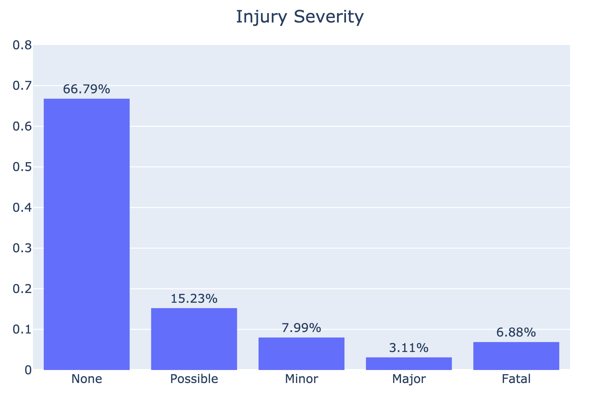

In [4]:
img = Image.open("assets/injury_severity_histogram.png")
display(img.resize((600, 400)))

Similar to injury severity, we label vehicle deformity by the worst damage sustained by a vehicle in an accident. So if one car sustained minor damage, and the other sustained major damage, that acccident is labeled as having major damage in vehicle deformity. Where in most accidents the person involved is not injured, it is the opposite for vehicle damage. If a vehicle is involed in an accident, there is only a 2.4% chance that there is no deformity, and the most likely outcome is that the vehicle was severely deformed.

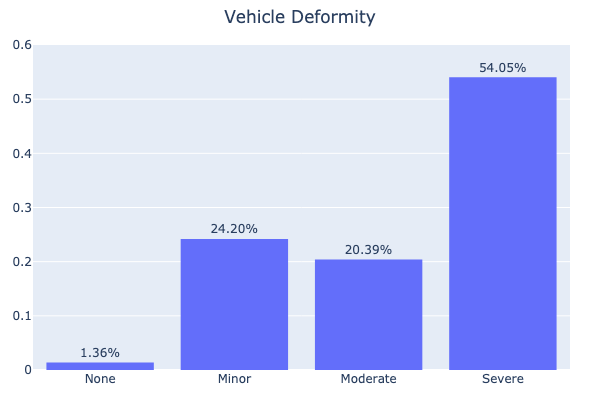

In [5]:
img = Image.open("assets/vehicle_deformity_histogram.png")
display(img.resize((600, 400)))

# Tests for Independence

In order to understand if a relationship exists between our features and reponse variables, we computed contingeny tables for several features that we believed would be key for our predictions. The features we chose were:
- `DRINKING`: Was drinking a factor in the accident
- `DRUGS`: Was drug use a factor in the accident
- `SPEEDREL`: Was excessive speed a factor in the accident
- `WEATHER`: Was the weather clear or were there atmoshperic conditions
- `TIME`: Was the accident in morning, afternoon, or night

Relative to the response variables:

- `INJ_SEV`: The worst injury sustained in the accident
- `DEFORMED`: The worst level of damage a vehicle sustained in the accident

The contingency tables can be seen below:

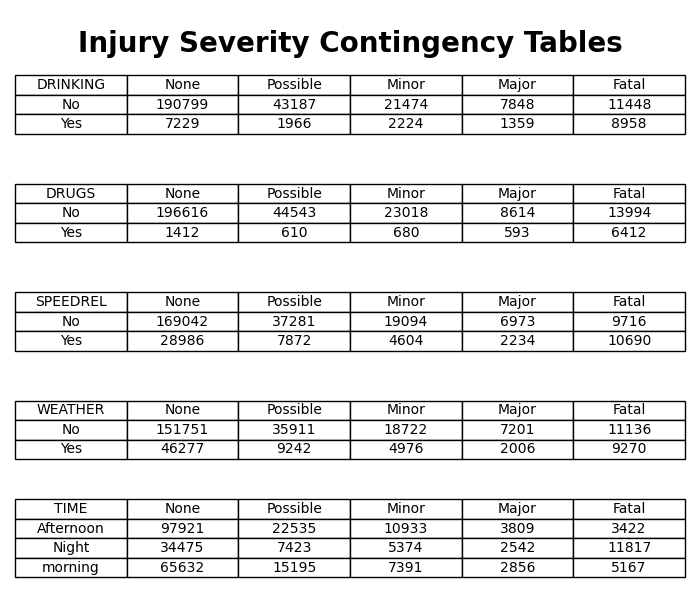

In [6]:
img = Image.open("assets/inj_sev_contingencies.png")
display(img)

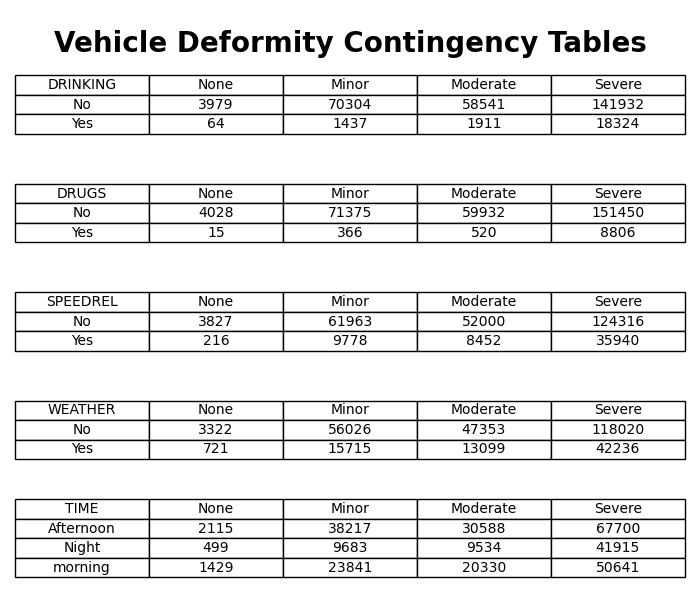

In [7]:
img = Image.open("assets/deformity_contingencies.png")
display(img)

By examining the contingency tables, it's quite obvious that there exists a relationship between the selected features and the reponse variables. That is, the counts of the injury severity type and the vehicle deformity type vary widely within features. Performing chi-squared tests for independence on all relationships yielded p-values of zero, leading us to reject the null hypotheses that each feature-response relationship is independent.The chi-squared test statistics for each hypothesis test are given below:

In [8]:
tstats = pd.read_csv("assets/chi_sq_tstats.csv", index_col = 0).round(2)
tstats

,Injury Severity,Vehicle Deformity
Drinking,45598.54,8713.07
Drugs,55987.76,5446.56
Speed Related,17863.75,4072.25
Weather Related,5590.84,912.17
Time,20045.61,6577.97


# Logisitic Regression Model

By hypothesis tests, we have determined that there is a relationship between the injury severity in a crash and the following features:

    - Drinking
    - Drugs
    - Speed
    - Weather
    - Time of day
    - Number of vehicle occupants
    - Vehicle model year

In order to quantify this replationship, we proceeded with logistic regression. Explicitly, we want to determine how much each feature affects the probability of injury occuring. Since injury severity takes on five possible values, our initial model was multi-class logistic regression. However, the R-squared results of this model were too low for the model to be any use. We believe that this is because the features don't differentiate the less severe classes of injury very well. For this reason, we remapped injury severity to either fatal or non-fatal crashes. Therefore, this logistic regression model predicts whether an accident will have one or more fatalities given the features.



Our logistic regression is given: 
$$
\text{log-odds}(\text{injury severity}= \text{fatal} \,|\, x_1, x_2, \dots, x_7) = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_7 x_7
$$
Where $x_i$ are one of the seven features above and $\beta_i$ is the learned weight associated with the feature. The interpretation of the weights is as follows: $\exp(\beta_i)$ is the relative change in odds for a one unit change in $x_i$ holding all other variables constant. Therefore, if the weight associated with the feature is positive, then increasing that feature is associated with an increase in the probability of a fatality. Similarly, if the weight associated with the feature is negative, then increasing that feature is associated with an decrease in the probability of a fatality.

The results of our model are below:


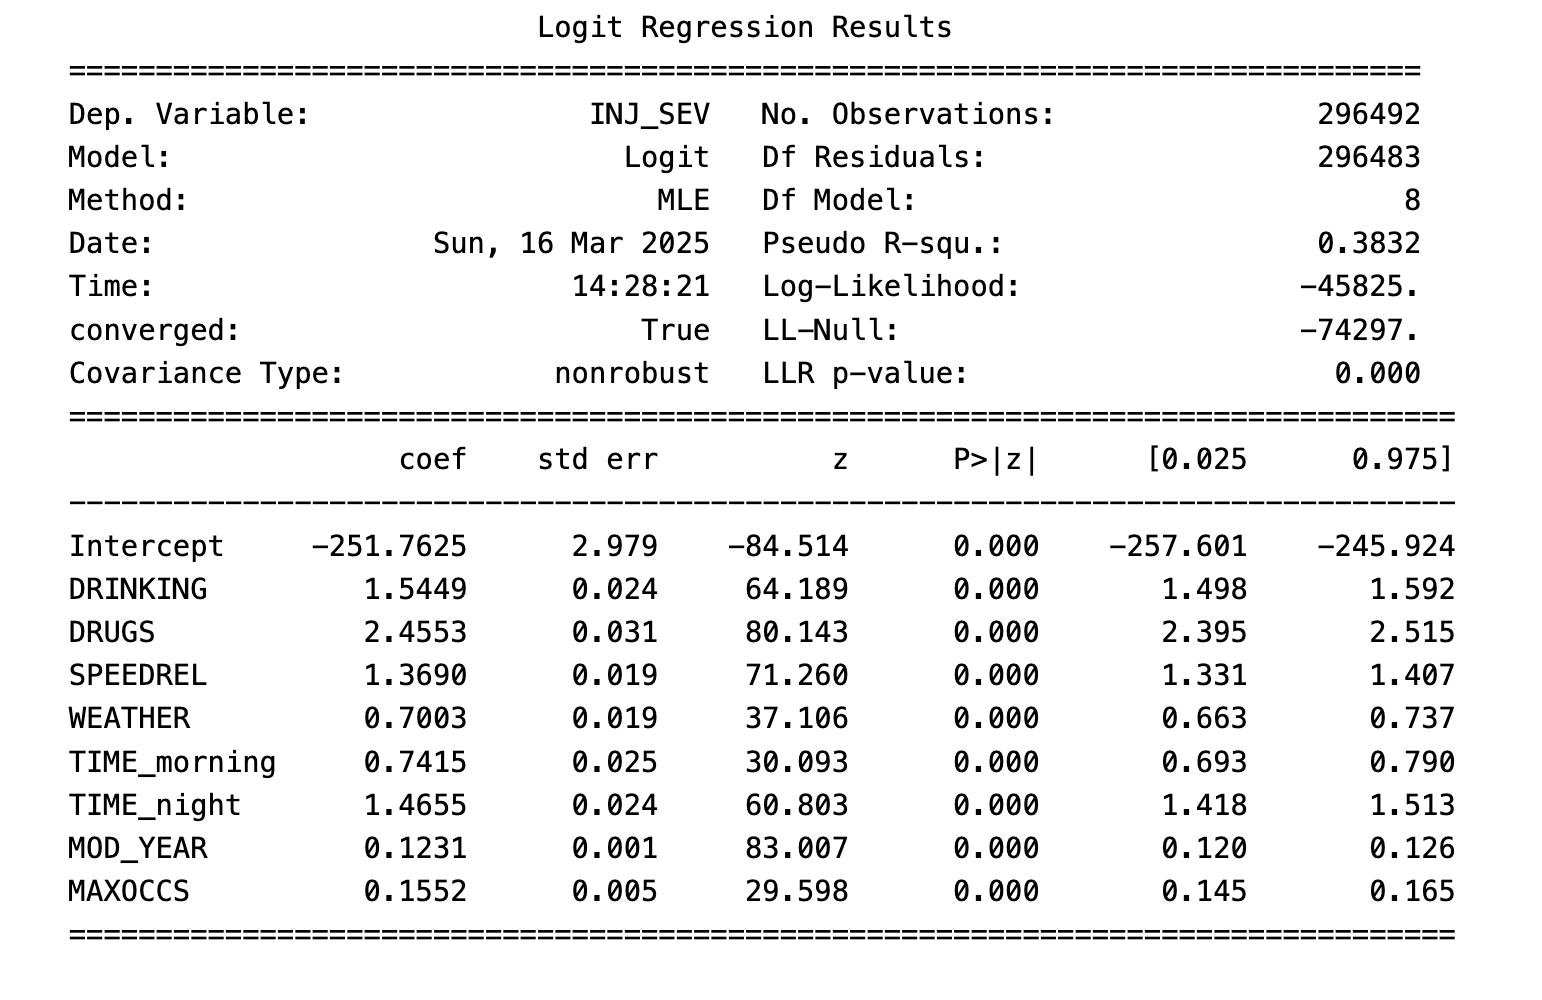

In [10]:
model_img = Image.open("assets/LGModel_Img.png")
model_img

## Analysis of Coefficients

From the results of our model, the p values of all coefficients are zero. These p values test the null hypothesis that the coefficent is zero against the alternative that it is non-zero. In effect, this is testing whehter the feature has a statistically significant effect on predicting if an accident is fatal. As can be seen above, all of the p values are zero, indicating that all of our features are strongly statistically significant. By exponentiating the coefficients, we can recover the odds ratios of each features. They are given in the table below:

In [14]:
odds_ratios = pd.read_csv("assets/odds_ratios.csv", index_col = 0).round(2)
odds_ratios

,Odds Ratios
DRUGS,11.65
DRINKING,4.69
TIME_night,4.33
SPEEDREL,3.93
TIME_morning,2.10
WEATHER,2.01
MAXOCCS,1.17
MOD_YEAR,1.13


Analyzing the binary and numerical oefficients in order of ssignificance:

- `Drugs`: An accident involing a person on drugs his 11.65x for likely to be fatal.
- `Drinking`: An accident involving a person who has been drinking is more 4.69x more likely to be fatal.
- `Speed`: An accident where speed was a factor is 3.93x more likely to be fatal. 
- `Weather`: An accident where there are atmospheric conditions 2.01x more likely to be fatal
- `Number of Occupants`: Additional occupants add a 1.17x chance that the accident will be fatal.
- `Model Year`: Newer models add 1.13x chance (per year) that the accident will be fatal.

The time of day feature was one-hot encoded with "afternoon" as the dummy variable. The interpretation of the coefficients are as follows:
- `morning`: Accidents that happen in the moring are 2.1x more likely to be fatal than accidents in the afternoon
- `night`: Accidents that happen at night are 4.33x more likely to be fatal than accidents in the afternoon.

